<a href="https://colab.research.google.com/github/lotkun/ML-Bootcamp/blob/master/KNN_HandwritingClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageFilter

In [138]:
data = np.load('/content/mnist_train_small.npy')

In [8]:
data

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
data.shape

(19999, 785)

In [10]:
X = data[:, 1:]
y = data[:, 0]

In [11]:
X.shape, y.shape

((19999, 784), (19999,))

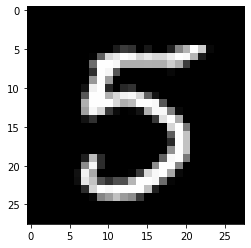

In [12]:
plt.imshow(X[0].reshape(28,28), cmap='gray')

In [13]:
y[0]

5

In [14]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier


In [16]:
model = KNeighborsClassifier()

In [17]:
# training the model happens in fit function
# plotting the point on the graph
# no work is happening in training Knn model 
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [19]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

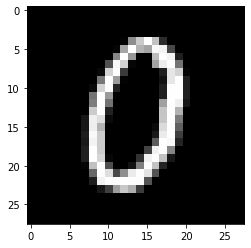

In [20]:
plt.imshow(X_test[2].reshape(28,28), cmap='gray')

In [21]:
model.score(X_test[:100], y_test[:100])

0.95

## Custom KNN - KNN implementation from scratch!


In [22]:
class CustomKNN:
  # constructor
  def __init__(self, n_neighbours = 5):
    self.n_neighbours = n_neighbours
  
  # training function
  def fit(self, X, y):
    self._X = (X - X.mean()) / X.std() # standardisation
    self._y = y
  
  # predict point
  # given a single point, tell me which class it belongs to
  def predict_point(self, point):
    #storing the dist of given 'point from each poin in training data
    list_dist = []

    # these point are from my training data
    for x_point, y_point in zip(self._X, self._y):
      dist_point = ((point - x_point) ** 2).sum()
      list_dist.append([dist_point, y_point])

    ## sorting the list according to the distance
    sorted_dist = sorted(list_dist)
    top_k = sorted_dist[:self.n_neighbours]

    #taking th count
    items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
    ans = items[np.argmax(counts)]
    return ans

  
  # predict
  # give me answer for each number in the array
  def predict(self, X):
    results = []
    X = (X - X.mean()) / X.std()
    for point in X:
      results.append(self.predict_point(point))
    return np.array(results, dtype=int)

  # score to measure my accuracy
  def score(self, X, y):
      return sum(self.predict(X) == y) / len(y)

In [23]:
m2 = CustomKNN()

In [24]:
m2.fit(X_train, y_train)

In [25]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [26]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [27]:
m2.score(X_test[:100], y_test[:100])

0.95

# Some tests

In [28]:
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

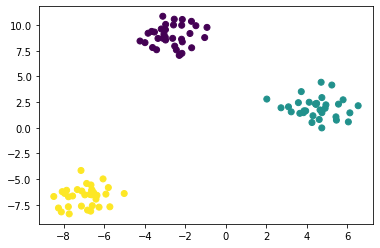

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [30]:
X

array([[-7.72642091, -8.39495682],
       [ 5.45339605,  0.74230537],
       [-2.97867201,  9.55684617],
       [ 6.04267315,  0.57131862],
       [-6.52183983, -6.31932507],
       [ 3.64934251,  1.40687195],
       [-2.17793419,  9.98983126],
       [ 4.42020695,  2.33028226],
       [ 4.73695639,  2.94181467],
       [-3.6601912 ,  9.38998415],
       [-3.05358035,  9.12520872],
       [-6.65216726, -5.57296684],
       [-6.35768563, -6.58312492],
       [-3.6155326 ,  7.8180795 ],
       [-1.77073104,  9.18565441],
       [-7.95051969, -6.39763718],
       [-6.60293639, -6.05292634],
       [-2.58120774, 10.01781903],
       [-7.76348463, -6.72638449],
       [-6.40638957, -6.95293851],
       [-2.97261532,  8.54855637],
       [-6.9567289 , -6.53895762],
       [-7.32614214, -6.0237108 ],
       [-2.14780202, 10.55232269],
       [-2.54502366, 10.57892978],
       [-2.96983639, 10.07140835],
       [ 3.22450809,  1.55252436],
       [-6.25395984, -7.73726715],
       [-7.85430886,

In [31]:
X[:4], y[:4]

(array([[-7.72642091, -8.39495682],
        [ 5.45339605,  0.74230537],
        [-2.97867201,  9.55684617],
        [ 6.04267315,  0.57131862]]), array([2, 1, 0, 1]))

In [32]:
li = [
    [23,0],
    [45,1],
    [19,0],
    [3,2],
    [10,0],
    [34,2],
    [100, 1]
]

In [33]:
sorted_li = sorted(li)

In [34]:
##sorted(li, key=lambda x: x[1])


In [35]:
top_k = sorted_li[:5]

In [36]:
li, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)

In [37]:
np.argmax(counts)

0

In [38]:
li, counts

(array([0, 2]), array([3, 2]))

## Convert an image to  MNIST 

In [ ]:
def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    print(tva)
    return tva

x=[imageprepare('/content/eight.png')]#file path here
print(len(x))# mnist IMAGES are 28x28=784 pixels
print(x[0])
#Now we convert 784 sized 1d array to 24x24 sized 2d array so that we can visualize it
newArr=[[0 for d in range(28)] for y in range(28)]
k = 0
for i in range(28):
    for j in range(28):
        newArr[i][j]=x[0][k]
        k=k+1

for i in range(28):
    for j in range(28):
        print(newArr[i][j])
        # print(' , ')
    print('\n')


plt.imshow(newArr, interpolation='nearest', cmap='gray')
plt.savefig('neweight.png')#save MNIST image
plt.show()#Show / plot that image


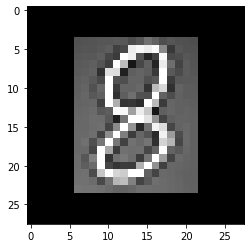

In [127]:
plt.imshow(newArr, cmap='gray')

In [132]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1,28, 28,1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('neweight.png')

	
	# predict the class
	digit = m2.predict(img)
	print(digit[0])
 
# entry point, run the example
run_example()

1
